In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse493g1/assignments/assignment3/'
FOLDERNAME = 'cse493g1/assignments/assignment3/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the COCO dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cse493g1/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/cse493g1/assignments/assignment3/cse493g1/datasets
/content/drive/My Drive/cse493g1/assignments/assignment3


# Multi-Layer Fully Connected Network Part 2
In this exercise, you will extend your fully connected network from Assignment 2 with Dropout and Normalization Layers. First, you will copy and paste all the necessary parts from Assignment 2. Then you will re-train your model from A2 as a baseline. Next, you will complete the batchnorm and dropout notebook, and then return to this notebook and create an improved model using dropout and normalization.

In [3]:
# Setup cell.
import time
import numpy as np
import matplotlib.pyplot as plt
from cse493g1.classifiers.fc_net import *
from cse493g1.data_utils import get_CIFAR10_data
from cse493g1.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cse493g1.solver import Solver

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error."""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
# Load the (preprocessed) CIFAR-10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (49000, 3, 32, 32)
y_train: (49000,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


# Copy necessary parts from A2.
Fill in the following functions by copying and pasting your answers from A2:
`affine_forward` in `cse493g1/layers.py`
`affine_backward` in `cse493g1/layers.py`
`relu_forward` in `cse493g1/layers.py`
`relu_backward` in `cse493g1/layers.py`
`softmax_loss` in `cse493g1/layers.py`
`sgd_momentum` in `cse493g1/optim.py`
`rmsprop` in `cse493g1/optim.py`
`adam` in `cse493g1/optim.py`



# Train baseline model from A2
Copy and Paste your `FullyConnectedNet` model from `cse493g1/classifiers/fc_net.py` in Assignment 2 into `FullyConnectedNetBasic` in the file `cse493g1/classifiers/fc_net.py` in this assignment. Use the best hyperparms that you found from the previous assignment to train this model. Call this model `best_model_basic`

Running with  rmsprop
(Iteration 1 / 4900) loss: 2.302537
(Epoch 0 / 10) train acc: 0.127000; val_acc: 0.121000
(Iteration 11 / 4900) loss: 2.126538
(Iteration 21 / 4900) loss: 2.022876
(Iteration 31 / 4900) loss: 1.997312
(Iteration 41 / 4900) loss: 1.873253
(Iteration 51 / 4900) loss: 2.019710
(Iteration 61 / 4900) loss: 2.016870
(Iteration 71 / 4900) loss: 1.873734
(Iteration 81 / 4900) loss: 2.012375
(Iteration 91 / 4900) loss: 1.846100
(Iteration 101 / 4900) loss: 2.009479
(Iteration 111 / 4900) loss: 1.766754
(Iteration 121 / 4900) loss: 1.739876
(Iteration 131 / 4900) loss: 1.871647
(Iteration 141 / 4900) loss: 1.859644
(Iteration 151 / 4900) loss: 1.852826
(Iteration 161 / 4900) loss: 1.853064
(Iteration 171 / 4900) loss: 1.782436
(Iteration 181 / 4900) loss: 1.891399
(Iteration 191 / 4900) loss: 1.757771
(Iteration 201 / 4900) loss: 1.714252
(Iteration 211 / 4900) loss: 1.935726
(Iteration 221 / 4900) loss: 1.762068
(Iteration 231 / 4900) loss: 1.990863
(Iteration 241 / 4900) 

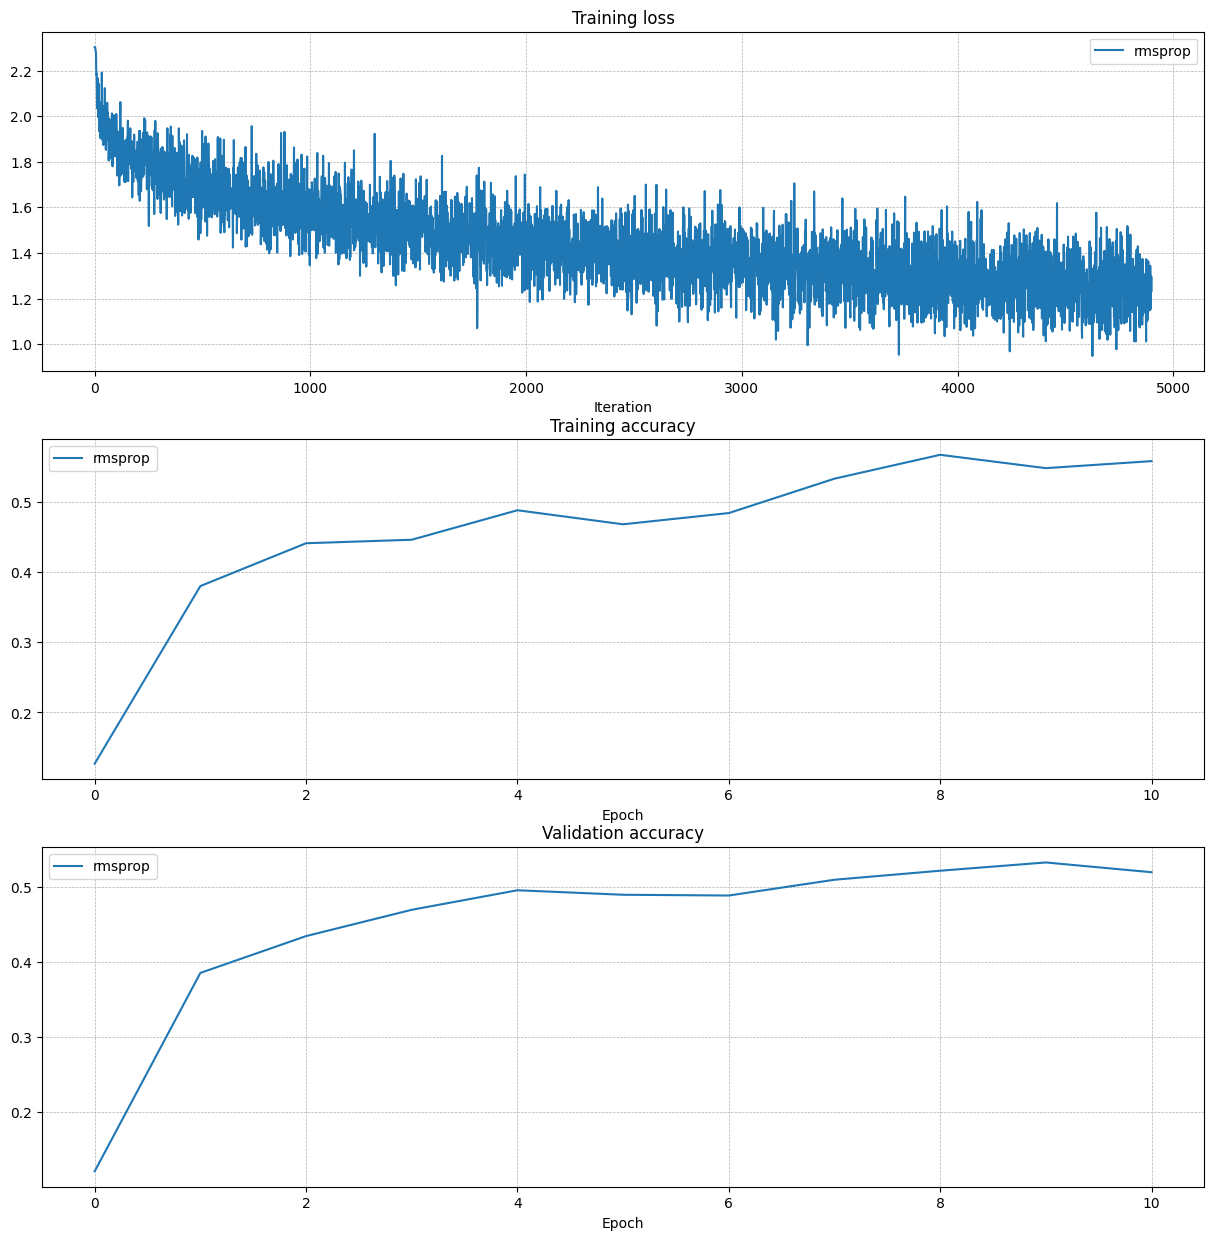

In [5]:
best_model_basic = None

################################################################################
# TODO: Train the best FullyConnectedNetBasic that you can on CIFAR-10. Store your best model in  #
# the best_model_basic variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

solvers = {}

learning_rates = {'rmsprop': 1e-4}
for update_rule in ['rmsprop']:
    print('Running with ', update_rule)
    model = FullyConnectedNetBasic(
        [100, 100, 100, 100],
        weight_scale=1e-2
    )
    solver = Solver(
        model,
        data,
        num_epochs=10,
        batch_size=100,
        update_rule=update_rule,
        optim_config={'learning_rate': learning_rates[update_rule]},
        verbose=True
    )
    solvers[update_rule] = solver
    solver.train()
    print()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for update_rule, solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"{update_rule}")
    axes[1].plot(solver.train_acc_history, label=f"{update_rule}")
    axes[2].plot(solver.val_acc_history, label=f"{update_rule}")

for ax in axes:
    ax.legend(loc='best', ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()
best_model_basic = model

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Evaluate baseline model from A2
Evaluate above baseline model.

In [6]:
y_test_pred = np.argmax(best_model_basic.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model_basic.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.532
Test set accuracy:  0.503


# Train improved model
Design a new model in `FullyConnectedNetImproved` in the file `cse493g1/classifiers/fc_net.py`. You can start by having `FullyConnectedNetImproved` be the same design as `FullyConnectedNetBasic`. Next, complete the BatchNormoralization.ipynb and Dropout.ipynb notebooks. Then return to this notebook and complete `FullyConnectedNetImproved` by adding in batchnorm and dropout. Try to beat the accuracy of your baseline model! You may have to adjust your hyperparameters.

In [18]:
best_model_improved = None

################################################################################
# TODO: Train the best FullyConnectedNetImproved that you can on CIFAR-10. You might   #
# find batch/layer normalization and dropout useful. Store your best model in  #
# the best_mode_improved variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

np.random.seed(493)

# Try training a very deep net with batchnorm.
hidden_dims = [100, 100, 100, 100]

num_train = 200
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = [1e-2]
reg = [1e-4,1e-5]
lr = [1e-3]

import itertools

combs = [(i,j,k) for i in weight_scale for j in reg for k in lr]

# 0.001 reg: 0.0001 lr: 0.001
for comb in combs:
  print("Weight_scale:", comb[0], "reg:", comb[1], "lr:", comb[2])
  bn_model = FullyConnectedNetImproved(hidden_dims, weight_scale=comb[0],
                                      reg= comb[1], dropout_keep_ratio = 0.75, normalization='batchnorm')
  # model = FullyConnectedNetImproved(hidden_dims, weight_scale=weight_scale, normalization=None)

  # print('Solver with batch norm:')
  bn_solver = Solver(bn_model, data,
                  num_epochs=10, batch_size=200,
                  update_rule='rmsprop',
                  optim_config={
                    'learning_rate': comb[2],
                  },lr_decay=0.95,
                  verbose=True,print_every=20)
  bn_solver.train()

best_model_improved = bn_model

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Weight_scale: 0.01 reg: 0.0001 lr: 0.001
(Iteration 1 / 2450) loss: 2.313211
(Epoch 0 / 10) train acc: 0.103000; val_acc: 0.119000
(Iteration 21 / 2450) loss: 1.982361
(Iteration 41 / 2450) loss: 1.983480
(Iteration 61 / 2450) loss: 1.870691
(Iteration 81 / 2450) loss: 1.813582
(Iteration 101 / 2450) loss: 1.891742
(Iteration 121 / 2450) loss: 1.703001
(Iteration 141 / 2450) loss: 1.812425
(Iteration 161 / 2450) loss: 1.725793
(Iteration 181 / 2450) loss: 1.769112
(Iteration 201 / 2450) loss: 1.766215
(Iteration 221 / 2450) loss: 1.836595
(Iteration 241 / 2450) loss: 1.748480
(Epoch 1 / 10) train acc: 0.415000; val_acc: 0.438000
(Iteration 261 / 2450) loss: 1.663875
(Iteration 281 / 2450) loss: 1.694798
(Iteration 301 / 2450) loss: 1.587590
(Iteration 321 / 2450) loss: 1.803962
(Iteration 341 / 2450) loss: 1.705653
(Iteration 361 / 2450) loss: 1.745042
(Iteration 381 / 2450) loss: 1.740166
(Iteration 401 / 2450) loss: 1.513890
(Iteration 421 / 2450) loss: 1.685886
(Iteration 441 / 2450

# Test Your Model!
Run your best model on the validation and test sets. Are you able to outperform the baseline model that has no Batchnorm or Dropout?

In [19]:
y_test_pred = np.argmax(best_model_improved.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model_improved.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.542
Test set accuracy:  0.524
